In [1]:
#Checking GPU Configurations for faster execution
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

## **Data Preparation and PreProcessing**

In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df_fake['label'] = 0
df_true['label'] = 1

In [7]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df = pd.concat([df_fake,df_true])
# To reshuffle the rows for random distribution of fake and real news
df = df.sample(frac=1)

In [10]:
#Checking if the dataset is randomly distributed or not
df.reset_index(inplace=True)
df.head()

,index,title,text,subject,date,label
0,20875,POLICE OFFICER Asks Daughter’s School To Remov...,What do you think about the school s response ...,left-news,"Mar 14, 2016",0
1,8614,Mike Pence warns of 'consequences' if Russia h...,WASHINGTON (Reuters) - U.S. Republican vice pr...,politicsNews,"July 27, 2016",1
2,5534,‘Sit On The Sofa And Lift Your Skirt Up’: 6 M...,Six more women have come forward to allege tha...,News,"July 9, 2016",0
3,4113,Sarah Palin Calls For Executing Democratic ‘C...,Sarah Palin agrees with Donald Trump that Demo...,News,"October 20, 2016",0
4,8748,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,News,"January 15, 2016",0


In [11]:
df.drop('index',axis=1,inplace=True)
df.head()

,title,text,subject,date,label
0,POLICE OFFICER Asks Daughter’s School To Remov...,What do you think about the school s response ...,left-news,"Mar 14, 2016",0
1,Mike Pence warns of 'consequences' if Russia h...,WASHINGTON (Reuters) - U.S. Republican vice pr...,politicsNews,"July 27, 2016",1
2,‘Sit On The Sofa And Lift Your Skirt Up’: 6 M...,Six more women have come forward to allege tha...,News,"July 9, 2016",0
3,Sarah Palin Calls For Executing Democratic ‘C...,Sarah Palin agrees with Donald Trump that Demo...,News,"October 20, 2016",0
4,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,News,"January 15, 2016",0


In [12]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
df.shape

(44898, 5)

## **Basic Data Exploration and Visualization**

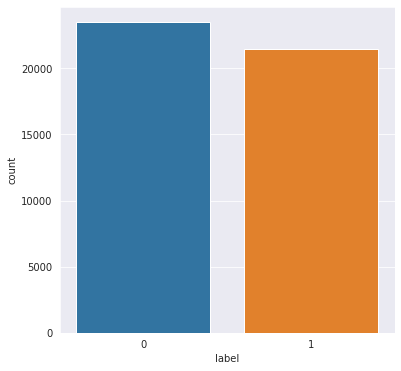

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='label',data=df)

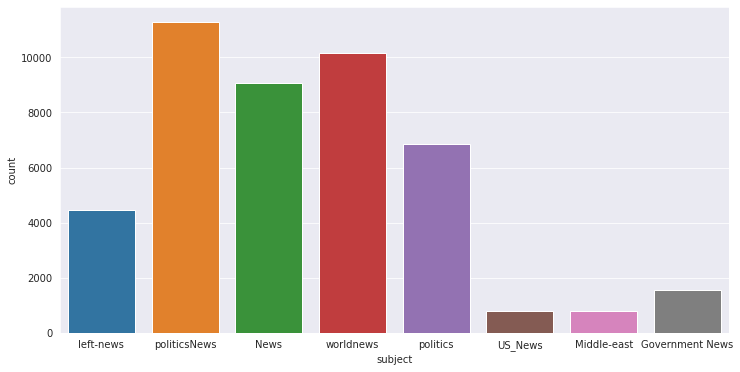

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='subject',data=df)

##**Using Title**

**Data Cleaning**

In [16]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
y = df['label']
X = df.drop('label',axis=1)

In [18]:
news = X.copy()

In [19]:
news.head()

,title,text,subject,date
0,POLICE OFFICER Asks Daughter’s School To Remov...,What do you think about the school s response ...,left-news,"Mar 14, 2016"
1,Mike Pence warns of 'consequences' if Russia h...,WASHINGTON (Reuters) - U.S. Republican vice pr...,politicsNews,"July 27, 2016"
2,‘Sit On The Sofa And Lift Your Skirt Up’: 6 M...,Six more women have come forward to allege tha...,News,"July 9, 2016"
3,Sarah Palin Calls For Executing Democratic ‘C...,Sarah Palin agrees with Donald Trump that Demo...,News,"October 20, 2016"
4,The Winner Of The GOP Debate Is…Bernie Sander...,If a debate is won according to who generates ...,News,"January 15, 2016"


In [20]:
news['title'][0]

'POLICE OFFICER Asks Daughter’s School To Remove Hateful Drawing From Display…School Has SHOCKING Response'

In [21]:
corpus=[]

for i in range(len(news)):
    text=re.sub('[^a-zA-Z]',' ',news['title'][i])
    text=text.lower()
    text_words=text.split()
    stem_words=[WordNetLemmatizer().lemmatize(word) for word in text_words if word not in stopwords.words('english') ]
    text=' '.join(stem_words)
    corpus.append(text)

In [22]:
corpus[:3]

['police officer asks daughter school remove hateful drawing display school shocking response',
 'mike penny warns consequence russia hacked email',
 'sit sofa lift skirt woman allege harassment fox news bos including teenager']

**Tokenizing and Padding Corpus**

In [23]:
vocab_size=50000
onehot_corpus=[one_hot(words,vocab_size) for words in corpus]
onehot_corpus[:5]

[[35758,
  17091,
  37506,
  4476,
  45736,
  41539,
  470,
  17608,
  34832,
  45736,
  22385,
  36697],
 [29671, 49384, 27730, 26674, 8165, 38457, 12470],
 [47541,
  16370,
  23231,
  7230,
  24122,
  13633,
  8450,
  49300,
  9519,
  8351,
  42712,
  11299],
 [16042, 1118, 15431, 6838, 8366, 35900, 25332, 1475],
 [2536, 4453, 4235, 10716, 8635]]

In [24]:
max_length=20
embedded_docs=pad_sequences(onehot_corpus,maxlen=max_length,padding='pre')
embedded_docs[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0, 35758,
        17091, 37506,  4476, 45736, 41539,   470, 17608, 34832, 45736,
        22385, 36697],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 29671, 49384, 27730, 26674,  8165,
        38457, 12470],
       [    0,     0,     0,     0,     0,     0,     0,     0, 47541,
        16370, 23231,  7230, 24122, 13633,  8450, 49300,  9519,  8351,
        42712, 11299],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 16042,  1118, 15431,  6838,  8366, 35900,
        25332,  1475],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,  2536,  4453,  4235,
        10716,  8635]], dtype=int32)

In [25]:
x=np.array(embedded_docs)
x.shape

(44898, 20)

**Defining Layers In the Neural Network**

In [26]:
features=50
model=Sequential()
# Embedding layer
model.add(Embedding(vocab_size,features,input_length=max_length))
# Long Short Term Memory layer
model.add(LSTM(100))
# Output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            2500000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,560,501
Trainable params: 2,560,501
Non-trainable params: 0
_________________________________________________________________
None


**Splitting and Training of Dataset**

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
492/492 [==============================] - 47s 34ms/step - loss: 0.3287 - accuracy: 0.8480 - val_loss: 0.1361 - val_accuracy: 0.9474
Epoch 2/10
492/492 [==============================] - 16s 32ms/step - loss: 0.0801 - accuracy: 0.9706 - val_loss: 0.1308 - val_accuracy: 0.9506
Epoch 3/10
492/492 [==============================] - 16s 33ms/step - loss: 0.0424 - accuracy: 0.9842 - val_loss: 0.1433 - val_accuracy: 0.9529
Epoch 4/10
492/492 [==============================] - 16s 33ms/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 0.2091 - val_accuracy: 0.9483
Epoch 5/10
492/492 [==============================] - 16s 32ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.2206 - val_accuracy: 0.9497
Epoch 6/10
492/492 [==============================] - 16s 32ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.2443 - val_accuracy: 0.9516
Epoch 7/10
492/492 [==============================] - 16s 33ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.2619 - val_accuracy:

In [29]:
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Model Evaluation**

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6997
           1       0.95      0.94      0.95      6473

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



## **Using Text**